In [1]:
#Importing Essential Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
#Data Cleaning
# Cleaning the Text
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


#Importing algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mukut\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mukut\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#Importing Dataset
dataset=pd.read_csv('Restaurant_Reviews.tsv', sep='\t')

In [3]:
#Top 5 records of a dataset
dataset.head()


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


2 Columns in a dataset 

Review is a independent feature

Liked is a label

In [4]:
#Shape of a dataset
dataset.shape

(1000, 2)

Number of positive and negative review

<AxesSubplot:xlabel='Liked', ylabel='count'>

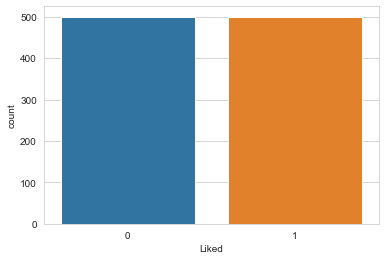

In [5]:
sns.set_style('whitegrid')
sns.countplot('Liked',data=dataset)

In [6]:
dataset['Liked'].value_counts()

0    500
1    500
Name: Liked, dtype: int64

So, the dataset is a balanced dataset with number of '1's and '0's being equal.

Data Cleaning

In [7]:
#Top 10 Sentiment text
dataset['Review'].head(10)

0                             Wow... Loved this place.
1                                   Crust is not good.
2            Not tasty and the texture was just nasty.
3    Stopped by during the late May bank holiday of...
4    The selection on the menu was great and so wer...
5       Now I am getting angry and I want my damn pho.
6                Honeslty it didn't taste THAT fresh.)
7    The potatoes were like rubber and you could te...
8                            The fries were great too.
9                                       A great touch.
Name: Review, dtype: object

In the below cell performing following :

    1) Will only keep alphabets , No special symbols and no Numbers
    
    2) Converting review to lower alphabets
    
    3) Splitting it into list
    
    4) Applying stopwords to keep important words from a review and keeping not in a review if it's present                 as it is closest word to help determine whether the review is good or not 
    
    5) using join to form again a sentence
    

In [8]:
corpus = []
for i in range(len(dataset)):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not') 
    #remove negative word 'not' as it is closest word to help determine whether the review is good or not 
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)


In [9]:
#First 5 review after cleaning
pd.DataFrame(list(zip(dataset['Review'],corpus[:5])),columns=['Review_before_Cleaning','Review_After_Cleaning'])

,Review_before_Cleaning,Review_After_Cleaning
0,Wow... Loved this place.,wow loved place
1,Crust is not good.,crust not good
2,Not tasty and the texture was just nasty.,not tasty texture nasty
3,Stopped by during the late May bank holiday of...,stopped late may bank holiday rick steve recom...
4,The selection on the menu was great and so wer...,selection menu great price


Now Review feature is clean and Dropping a review 

In [10]:
#Droping a Review
dataset.drop(['Review'],axis=1,inplace=True)

In [11]:
#New Feature Review which containg clean review
dataset['Review']=corpus

In [12]:
#Top 5 record now
dataset.head()

,Liked,Review
0,1,wow loved place
1,0,crust not good
2,0,not tasty texture nasty
3,1,stopped late may bank holiday rick steve recom...
4,1,selection menu great price


Splitting a dataset into training and testing sets

In [13]:
x_train , x_test , y_train , y_test = train_test_split(dataset['Review'],dataset['Liked'],test_size=0.20,random_state=42,shuffle=True)

In [14]:
#Initialize TfidVectorizer
count_vec=TfidfVectorizer()
    
#Fill count_vec on dataset
count_vec.fit(x_train)
    
#Transform 
transform_tarin=count_vec.transform(x_train)
transform_test=count_vec.transform(x_test)

1) Using Logistic Regression

In [15]:
#Initialising model
lr=LogisticRegression()

#Fitting a training dataset
lr.fit(transform_tarin,y_train)

#Predicting a review of testing
pred1=lr.predict(transform_test)

#Accuracy score of prediction
print("Training score :  ",lr.score(transform_tarin,y_train))
print("Testing Score :  ",accuracy_score(pred1,y_test))

Training score :   0.96125
Testing Score :   0.78


2) Using KNN

In [16]:
#Initialising model
knn=KNeighborsClassifier()

#Fitting a training dataset
knn.fit(transform_tarin,y_train)

#Predicting a review of testing
pred2=knn.predict(transform_test)

#Accuracy score of prediction
print("Training score :  ",knn.score(transform_tarin,y_train))
print("Testing Score :  ",accuracy_score(pred2,y_test))

Training score :   0.86
Testing Score :   0.75


3) Using random Forest classier

In [17]:
#Initialising model
rf=RandomForestClassifier()

#Fitting a training dataset
rf.fit(transform_tarin,y_train)

#Predicting a review of testing
pred3=rf.predict(transform_test)

#Accuracy score of prediction
print("Training score :  ",rf.score(transform_tarin,y_train))
print("Testing Score :  ",accuracy_score(pred3,y_test))

Training score :   1.0
Testing Score :   0.745


4) Using SVC

In [18]:
#Initialising model
svc=SVC()

#Fitting a training dataset
svc.fit(transform_tarin,y_train)

#Predicting a review of testing
pred4=svc.predict(transform_test)

#Accuracy score of prediction
print("Training score :  ",svc.score(transform_tarin,y_train))
print("Testing Score :  ",accuracy_score(pred4,y_test))

Training score :   0.9975
Testing Score :   0.805


5) Using XGboost

In [19]:
#Initialising model
xg=XGBClassifier()

#Fitting a training dataset
xg.fit(transform_tarin,y_train)

#Predicting a review of testing
pred5=xg.predict(transform_test)

#Accuracy score of prediction
print("Training score :  ",xg.score(transform_tarin,y_train))
print("Testing Score :  ",accuracy_score(pred5,y_test))

[13:13:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training score :   0.92375
Testing Score :   0.715


Logistic Regression Giving a better accuracy


In [20]:
#Initialize TfidVectorizer
count_vec=TfidfVectorizer()
    
#Fill count_vec on dataset
count_vec.fit(dataset['Review'])
    
#Transform 
X=count_vec.transform(dataset['Review'])


In [21]:
#Initialising model
lr=LogisticRegression()

#Fitting a training dataset
lr.fit(X,dataset['Liked'])


#Accuracy score of training set
print("Training score :  ",lr.score(X,dataset["Liked"]))


Training score :   0.957


In [37]:
#Predicting a revied
p=lr.predict(count_vec.transform(["Tasty food"]))

In [38]:
print("Predicted target name: {}".format(
dataset['Liked'][p]))


Predicted target name: 1    0
Name: Liked, dtype: int64


In [33]:
dataset.head()

,Liked,Review
0,1,wow loved place
1,0,crust not good
2,0,not tasty texture nasty
3,1,stopped late may bank holiday rick steve recom...
4,1,selection menu great price
